# CS-E4600 — Programming project

## Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh

## Read file

In [32]:
file = 'test.txt'

## Read Edges

In [33]:
pd_edges = pd.read_csv('./graphs_processed/' + file, sep=" ", skiprows=range(0, 1), header=None)
pd_edges.columns = ["FromNodeId","ToNodeId"]
#pd_edges

## Select Distinct Nodes

In [34]:
node_candidates_1 = pd_edges.drop_duplicates(subset="FromNodeId")["FromNodeId"]
node_candidates_2 = pd_edges.drop_duplicates(subset="ToNodeId")["ToNodeId"]

In [35]:
pd_nodes = pd.concat([node_candidates_1, node_candidates_2])
pd_nodes = pd_nodes.drop_duplicates()
#pd_nodes

## Convert Nodes to Numpy

In [36]:
nodes = pd_nodes.values
edges = pd_edges.values
#nodes.shape, edges.shape

## Create Adjacency Matrix

In [37]:
adjacency_matrix = np.zeros((nodes.size, nodes.size))
#adjacency_matrix.shape

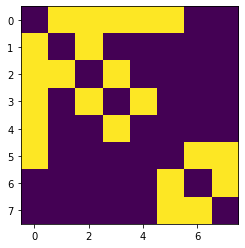

In [38]:
for i in range(0,edges.shape[0]):
    adjacency_matrix[edges[i,0], edges[i,1]] = 1
    adjacency_matrix[edges[i,1], edges[i,0]] = 1
#np.sum(adjacency_matrix)
plt.imshow(adjacency_matrix)

## Create Laplacian Matrix

In [39]:
laplacian = csgraph.laplacian(adjacency_matrix, normed=True)
np.sum(laplacian)

0.2532426070721109

## Alternative way for the Laplacian Matrix

In [40]:
degrees = np.sum(adjacency_matrix, axis=0)
L_normed = np.identity((nodes.size))
for i in range(nodes.size):
    for j in range(nodes.size):
        if i != j and adjacency_matrix[i,j] == 1:
            L_normed[i,j] = -1.0/(np.sqrt(degrees[i]*degrees[j]))

In [41]:
degrees = np.sum(adjacency_matrix, axis=0)
L = degrees * np.identity((nodes.size))
for i in range(nodes.size):
    for j in range(nodes.size):
        if i != j and adjacency_matrix[i,j] == 1:
            L[i,j] = -1

In [42]:
np.sum(L_normed)

0.2532426070721102

## Calculate Eigenvectors

In [43]:
_w, _v = np.linalg.eig(L_normed)

In [44]:
w, v = eigsh(laplacian, 5, which="SA")

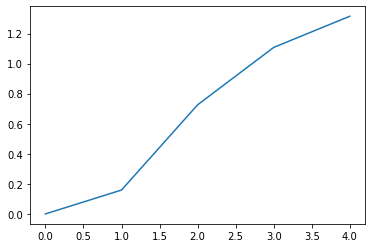

In [45]:
plt.plot(w)

In [46]:
eig_val_idx = np.argpartition(w,2)[1]
eig_val_idx

1

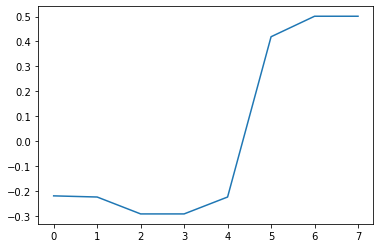

In [47]:
eig_vec = v[:,eig_val_idx]
plt.plot(eig_vec)